# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## imports for Python, Pandas

In [416]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [417]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [418]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [419]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [420]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [421]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [422]:
# Load the full dataset
df = pd.read_json('data/world_bank_projects.json')


In [423]:
# Get the 10 countries with most projects

#Load only the data slice to be worked on
cty_proj = df[['project_name','countryname']]

cty_proj.groupby('countryname')['project_name'].count().sort_values(ascending=False).head(10)


countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: project_name, dtype: int64

                                              name  total_count
code                                                           
11    Environment and natural resources management          250
10                               Rural development          216
8                                Human development          210
2                         Public sector governance          199
6            Social protection and risk management          168
4         Financial and private sector development          146
7                      Social dev/gender/inclusion          130
5                            Trade and integration           77
9                                Urban development           50
1                              Economic management           38


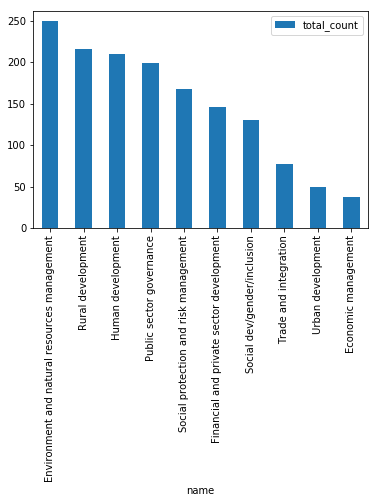

In [505]:
#The top 10 major project themes (using column 'mjtheme_namecode')

df_theme = df['mjtheme_namecode'] 

all_themes = pd.DataFrame()

for i in df_theme.index:
    df_norm = json_normalize(df_theme[i])
    all_themes = pd.concat([all_themes,df_norm]).reset_index(drop=True)

result = all_themes.groupby('code')['code'].count()
result = pd.DataFrame(result)
result.columns = ['total_count']


# Build unique set of values of code-name pair
all_themes_clean = all_themes[all_themes.name !='']
unique_cn_pair = pd.DataFrame(all_themes_clean.groupby(['code','name'])['code'].count())
unique_cn_pair.columns = ['cnt']
unique_cn_pair = unique_cn_pair.reset_index('name')

# Fetch the top 10 project theme names
top10 = pd.concat([unique_cn_pair,result], axis=1).sort_values('cnt', ascending=False).head(10)
print(top10[['name','total_count']])
top10.plot(kind='bar',x='name',y='total_count')

In [425]:
#  Create a dataframe with the missing names filled in.

code_names = dict()

# Build a dictionary of all code and names (Another way of building unique code-name pairs from earlier step)
for i in all_themes.index:
    if ((all_themes.code[i] not in code_names) & (len(all_themes.name[i]) > 0)):
        code_names[all_themes.code[i]] = all_themes.name[i]

        
# Look up the dictionary for missing values and build the dataframe. Print it.
for i in all_themes.index:
    if (all_themes.name[i]==''):
        all_themes.name[i] = code_names[all_themes.code[i]]

print(all_themes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
code    1499 non-null object
name    1499 non-null object
dtypes: object(2)
memory usage: 23.5+ KB
None
     code                                          name
0       8                             Human development
1      11  Environment and natural resources management
2       1                           Economic management
3       6         Social protection and risk management
4       5                         Trade and integration
5       2                      Public sector governance
6      11  Environment and natural resources management
7       6         Social protection and risk management
8       7                   Social dev/gender/inclusion
9       7                   Social dev/gender/inclusion
10      5                         Trade and integration
11      4      Financial and private sector development
12      6         Social protection and risk management
13    